# Actividad Final 5.14

Una instalación frigorífica funciona con refrigerante R134a a una temperatura de condensación de 50 °C y de evaporación de -10 °C. Sabemos que el recalentamiento es de 5 °C y el subenfriamiento es de 2 °C y el caudal másico es de 0,05 kg/s.
- Dibuja los elementos básicos del circuito frigorífico sobre el diagrama de Mollier.
- Calcula el calor absorbido por el refrigerante.
- Calcula la potencia frigorífica en kW y en kcal/h.
- Calcula el trabajo total de compresión.
- Calcula el EER.

In [17]:
import pyromat as pm
pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100
import warnings
warnings.filterwarnings('ignore')

El punto 1 tendrá el valor de la presión de evaporación y la temperatura será la temperatura de evaporación saturada de líquido más 5º de recalentamiento. Una vez obtenido el punto sobre el diagrama anotamos los valores de entropía y entalpía.

Entalpía del punto 1: 396.9 kJ/kg
Entropía del punto 1: 1.7494 kJ/kg


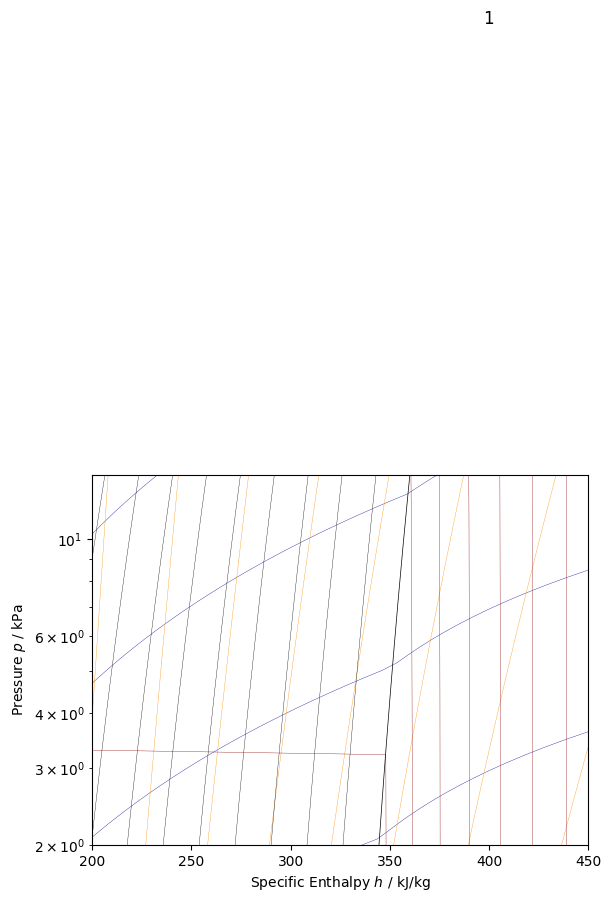

In [18]:
mp_R134a = pm.get("mp.C2H2F4")
T1 = -10+5 + 273.15 # K <--given
p_ev= mp_R134a.ps(T=T1-5)
h1 = mp_R134a.h(T=T1, p=p_ev)
s1 = mp_R134a.s(T=T1, p=p_ev)
print(f"Entalpía del punto 1: {round(float(h1),1)} kJ/kg")
print(f"Entropía del punto 1: {round(float(s1),4)} kJ/kg")
import CoolProp
from CoolProp.Plots import PropertyPlot
import matplotlib.pyplot as plt
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = h1, y = p_ev, color='r')
ax.text(h1, p_ev-50, '1', fontsize = 12)
plt.xlim(200,450)
plt.ylim(2,14)
plot.show()

El punto 2 tendrá el valor de la presión de condensación y la entropía del puto 1. Este valor implica que la compresión  sea isoentrópica. 

Presión punto 2: 1317.7 KPa
Entalpía del punto 2: 437.3 kJ/kg


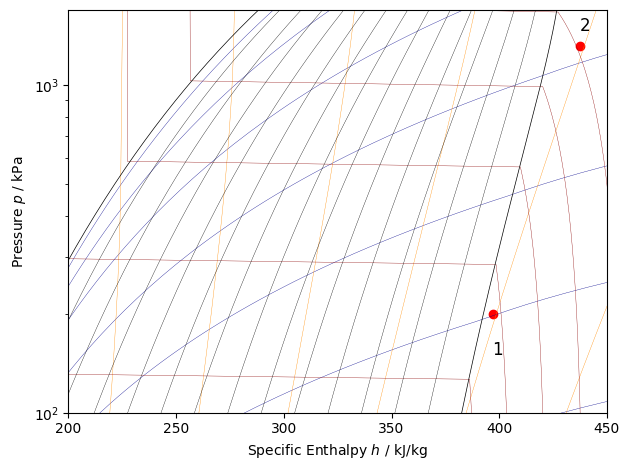

In [19]:
T_con = 50 +273.15 # K <--given
p_g = mp_R134a.ps(T=T_con)
h2 = mp_R134a.h(s=s1, p=p_g)
print(f"Presión punto 2: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 2: {round(float(h2),1)} kJ/kg")

plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = h1, y = p_ev, color='r')
ax.text(h1, p_ev-50, '1', fontsize = 12)
ax.scatter(x = h2, y = p_g, color='r')
ax.text(h2, p_g+150, '2', fontsize = 12)
plt.xlim(200,450)
plt.ylim(100,1700)
plot.show()


El punto 3 tendrá el valor de la presión de condensación y la temperatura será la temperatura de condensación menos el valor del subenfriamiento de líquido. Una vez dibujado, obtenemos la entalpía.

Presión punto 3: 1317.7 KPa
Entalpía del punto 3: 268.5 kJ/kg


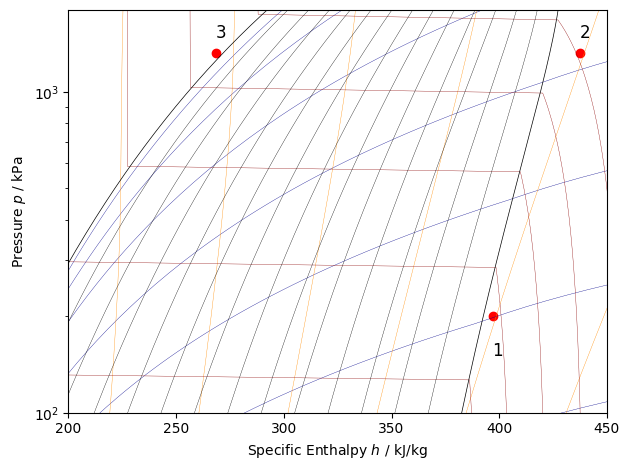

In [20]:
p_g = mp_R134a.ps(T=T_con)
print(f"Presión punto 3: {round(float(p_g),1)} KPa")
h3 = mp_R134a.h(T=T_con-2,p=p_g)
print(f"Entalpía del punto 3: {round(float(h3[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = h1, y = p_ev, color='r')
ax.text(h1, p_ev-50, '1', fontsize = 12)
ax.scatter(x = h2, y = p_g, color='r')
ax.text(h2, p_g+150, '2', fontsize = 12)
ax.scatter(x = h3, y = p_g, color='r')
ax.text(h3, p_g+150, '3', fontsize = 12)
plt.xlim(200,450)
plt.ylim(100,1800)
plot.show()

El punto 4 tendrá el valor de la entalpía del punto 3 y la presión y temperatura de evaporación.

Presión punto 4: 200.6 KPa
Entalpía del punto 4: 268.5 kJ/kg


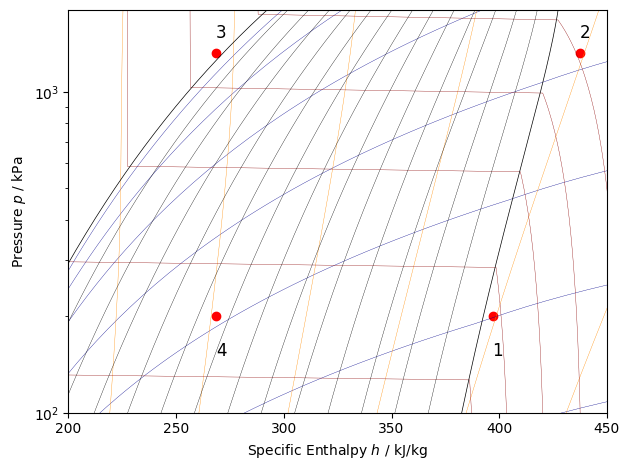

In [21]:
h4 = h3
P4 = mp_R134a.ps(T=T1-5)
print(f"Presión punto 4: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 4: {round(float(h3[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = h1, y = p_ev, color='r')
ax.text(h1, p_ev-50, '1', fontsize = 12)
ax.scatter(x = h2, y = p_g, color='r')
ax.text(h2, p_g+150, '2', fontsize = 12)
ax.scatter(x = h3, y = p_g, color='r')
ax.text(h3, p_g+150, '3', fontsize = 12)
ax.scatter(x = h4, y = p_ev, color='r')
ax.text(h3, p_ev-50, '4', fontsize = 12)
plt.xlim(200,450)
plt.ylim(100,1800)
plot.show()

Resumiento el ciclo frigorífico estará formado por los siguientes puntos:

In [22]:
print(f"Presión punto 1: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 1: {round(float(h1),1)} kJ/kg")
print(f"Presión punto 2: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 2: {round(float(h2),1)} kJ/kg")
print(f"Presión punto 3: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 3: {round(float(h3[0]),1)} kJ/kg")
print(f"Presión punto 4: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 4: {round(float(h3[0]),1)} kJ/kg")

Presión punto 1: 200.6 KPa
Entalpía del punto 1: 396.9 kJ/kg
Presión punto 2: 1317.7 KPa
Entalpía del punto 2: 437.3 kJ/kg
Presión punto 3: 1317.7 KPa
Entalpía del punto 3: 268.5 kJ/kg
Presión punto 4: 200.6 KPa
Entalpía del punto 4: 268.5 kJ/kg


El calor abosobido por el refrigerante será:
$$Q_{absorbido}=h_{1}-h_{4}$$

Calor absorbido por el refrigerante: 128.4 kJ/kg


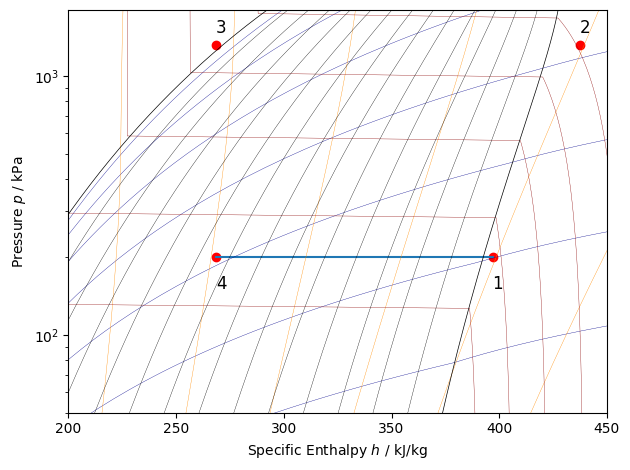

In [23]:
q_L = h1 - h4
print(f"Calor absorbido por el refrigerante: {round(float(q_L[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
pto1 = ax.scatter(x = h1, y = p_ev, color='r')
txt1= ax.text(h1, p_ev-50, '1', fontsize = 12)
pto2= ax.scatter(x = h2, y = p_g, color='r')
txt2= ax.text(h2, p_g+150, '2', fontsize = 12)
pto3= ax.scatter(x = h3, y = p_g, color='r')
txt3= ax.text(h3, p_g+150, '3', fontsize = 12)
pto4= ax.scatter(x = h4, y = p_ev, color='r')
txt4= ax.text(h3, p_ev-50, '4', fontsize = 12)
ax.plot([h1,h4],[p_ev,p_ev])
plt.xlim(200,450)
plt.ylim(50,1800)
plot.show()

El calor eliminaado en el condensador será:
$$Q_{eliminado}=h_{2}-h_{3}$$

Calor eliminado en el condensador: 168.8 kJ/kg


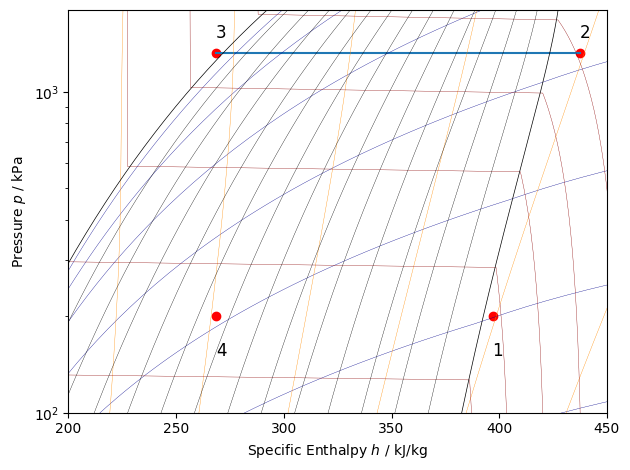

In [24]:
q_H = h2 -h3
print(f"Calor eliminado en el condensador: {round(float(q_H[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
pto1 = ax.scatter(x = h1, y = p_ev, color='r')
txt1= ax.text(h1, p_ev-50, '1', fontsize = 12)
pto2= ax.scatter(x = h2, y = p_g, color='r')
txt2= ax.text(h2, p_g+150, '2', fontsize = 12)
pto3= ax.scatter(x = h3, y = p_g, color='r')
txt3= ax.text(h3, p_g+150, '3', fontsize = 12)
pto4= ax.scatter(x = h4, y = p_ev, color='r')
txt4= ax.text(h3, p_ev-50, '4', fontsize = 12)
ax.plot([h3,h2],[p_g,p_g])
plt.xlim(200,450)
plt.ylim(100,1800)
plot.show()

La potencia frigorífica será: 
$$\dot{Q}=\dot{m}*Q_{absorbido}$$

In [25]:
m_dot = 0.02
print(f"Potencia frigorífica: {round(float(q_L[0]*m_dot),2)} kW")


Potencia frigorífica: 2.57 kW


El equivalente térmico del trabajo total de compresión.
$$W_{compresor}=h_{2}-h_{1}$$

Equivalente térmico del trabajo del compresor: 40.4 kJ/kg


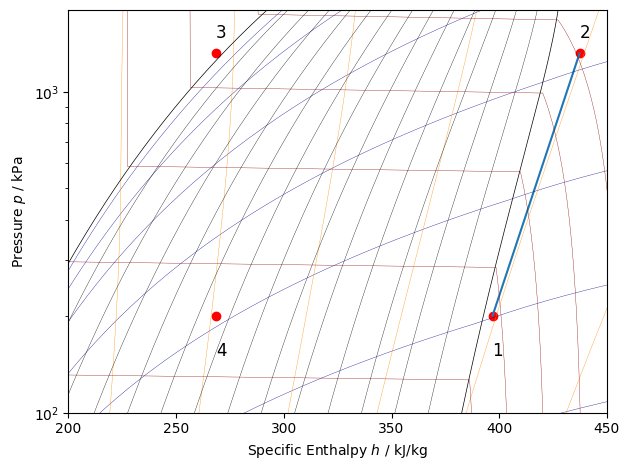

In [26]:
w_c = h2-h1
print(f"Equivalente térmico del trabajo del compresor: {round(float(w_c),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
pto1 = ax.scatter(x = h1, y = p_ev, color='r')
txt1= ax.text(h1, p_ev-50, '1', fontsize = 12)
pto2= ax.scatter(x = h2, y = p_g, color='r')
txt2= ax.text(h2, p_g+150, '2', fontsize = 12)
pto3= ax.scatter(x = h3, y = p_g, color='r')
txt3= ax.text(h3, p_g+150, '3', fontsize = 12)
pto4= ax.scatter(x = h4, y = p_ev, color='r')
txt4= ax.text(h3, p_ev-50, '4', fontsize = 12)
ax.plot([h2,h1],[p_g,p_ev])
plt.xlim(200,450)
plt.ylim(100,1800)
plot.show()

El coeficiente de eficiencia energética EER será:
$$EER = \frac{Q_{absorbido}}{W_{compresor}}$$

In [27]:
beta = q_L/w_c
print(f"EER: {round(float(beta[0]),3)}")

EER: 3.181


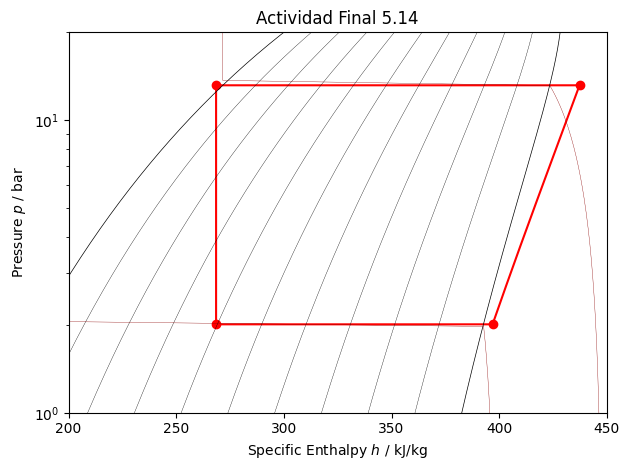

In [28]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
from CoolProp.CoolProp import PropsSI
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
pp.calc_isolines(CoolProp.iQ, num=11)
Te = -10
Tc = 50
pp.calc_isolines(CoolProp.iT, [Te,Tc], num=2)
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')
cycle.simple_solve_dt(Te+273.15, Tc+273.15, 5, 2, 1, SI=True)
cycle.steps = 50
sc = cycle.get_state_changes()
import matplotlib.pyplot as plt
plt.close(cycle.figure)
pp.draw_process(sc)
plt.title("Actividad Final 5.14")
plt.xlim(200,450)
plt.ylim(1,20)

pp.show()